
## Autograded Notebook (Canvas & CodeGrade)

This notebook will be automatically graded. It is designed to test your answers and award points for the correct answers. Following the instructions for each Task carefully.
Instructions

- **Download** this notebook as you would any other ipynb file 
- **Upload** to Google Colab or work locally (if you have that set-up)
- **Delete** `raise NotImplementedError()`

- **Write** your code in the `# YOUR CODE HERE` space


- **Execute** the Test cells that contain assert statements - these help you check your work (others contain hidden tests that will be checked when you submit through Canvas)

- **Save** your notebook when you are finished
- **Download** as a ipynb file (if working in Colab)
- **Upload** your complete notebook to Canvas (there will be additional instructions in Slack and/or Canvas)



<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Simple Perceptron](#Q2)
    - Perceptron
    - Multilayer Perceptron
    - Analyze and Compare
4. [Keras MMP](#Q3)

<a id="Q1"></a>
## 1. Defining Neural Networks 

Write *your own* definitions for the following terms:

- **Neuron:**

- **Input Layer:** 

- **Hidden Layer:** 

- **Output Layer:**

- **Activation:** 

YOUR ANSWER HERE  
**Neuron** = or artificial neuron, it is a layer which mathematically transform the data, also referred to as a perceptron.   
**Input Layer** = the beginning of the artificial neural network in the workflow.   
**Hidden Layer** = this is the layer between input and output layers.   
**Output Layer** = is the last layer that produces given outputs.    
**Activation** = used to determine the output and it maps the resulting values.

Explain how back propagation works as if you were explaining it to a five year-old. Use your own words, but feel free to reference external materials for this question. 

**YOUR ANSWER HERE**    
Back propagation is a process used to learn error function, this method calculates of the error function with respect to the neural network's weights. This is a backward flow of the error information allows for efficient computation at each layer versus calculating each layer separately.

Remember our Simple Perceptron Class from Monday. In a simple prediction describe the process of making a prediction. How do you go from inputs to predicted output.

**YOUR ANSWER HERE**   
Start with values (often random) for the network parameters (weights and biases). Take a set of examples of input data and pass them through the network to obtain their prediction. Compare these predictions obtained with the values of expected labels and calculate the loss with them. Perform the backpropagation in order to propagate this loss to each and every one of the parameters that make up the model of the neural network. Use this propagated information to update the parameters of the neural network with the gradient descent in a way that the total loss is reduced and a better model is obtained. Continue iterating in the previous steps until we consider that we have a good model.

<a id="Q2"></a>
## 2. Simple Perceptron

In this question, you will build two neural networks using Tensorflow Keras. After you build these two models, compare the results of the model.

In [ ]:
"""
Our Dataset
"""
import numpy as np


rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

### Simple Perceptron
Construct a simple perceptron using Keras. 

You model should have `1 dense layer` with a `single neuron` and a `sigmoid activation function`. 


Your model should be called `model1` and make sure to save the results of your fit statement to a variable called `h1`. 


In [ ]:
#import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# build and fit model

# YOUR CODE HERE
model1 = Sequential()
model1.add(Dense(units=1, input_dim=2, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
h1 = model1.fit(X, y, epochs=10)

Epoch 1/10
10/10 [==============================] - 1s 1ms/step - loss: 0.9921 - accuracy: 0.4414
Epoch 2/10
10/10 [==============================] - 0s 1ms/step - loss: 1.0025 - accuracy: 0.4305
Epoch 3/10
10/10 [==============================] - 0s 1ms/step - loss: 1.0167 - accuracy: 0.4299
Epoch 4/10
10/10 [==============================] - 0s 1ms/step - loss: 1.0158 - accuracy: 0.4420
Epoch 5/10
10/10 [==============================] - 0s 1ms/step - loss: 1.0048 - accuracy: 0.4183
Epoch 6/10
10/10 [==============================] - 0s 1ms/step - loss: 0.9697 - accuracy: 0.4618
Epoch 7/10
10/10 [==============================] - 0s 2ms/step - loss: 0.9996 - accuracy: 0.4384
Epoch 8/10
10/10 [==============================] - 0s 1ms/step - loss: 0.9891 - accuracy: 0.4374
Epoch 9/10
10/10 [==============================] - 0s 1ms/step - loss: 0.9713 - accuracy: 0.4325
Epoch 10/10
10/10 [==============================] - 0s 1ms/step - loss: 0.9344 - accuracy: 0.4821


In [ ]:
# Visible test
assert len(model1.get_config()["layers"]) == 2, "Make sure you only create 1 Dense layer."
assert len(h1.epoch) <=10, "Did you make sure to set epochs to 10 or less?"

In [ ]:
# evaluate the model
scores = model1.evaluate(X, y)
print(f"{model1.metrics_names[1]}: {scores[1]*100}")

10/10 [==============================] - 0s 1ms/step - loss: 0.9580 - accuracy: 0.4500
accuracy: 44.999998807907104


In [ ]:
# Hidden tests - you will see the results when you submit to Canvas

### Multi-Layer Perceptron
Now construct a multi-layer perceptron using. Here are some architecture suggestions: 
- `2` Hidden Layers
- `5-32` Neurons in the Hidden Layers
- Your pick of activation function and optimizer
- Incorporate the `Callback function` below into your model
- Set epochs to `100`

Your model should be called `model2` and make sure to save the results of your fit statement to a variable called `h2`. 

In [ ]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > .99999):   
            self.model.stop_training = True

In [ ]:
# build and fit model

# YOUR CODE HERE
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import ReLU
import tensorflow as tf
import os

callbks = myCallback()

model2 = tf.keras.Sequential([
    Dense(5, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model2.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])

h2 = model2.fit(X, y, epochs=100, 
         callbacks = callbks
)          

#model1 = Sequential()
#model1.add(Dense(units=1, input_dim=2, activation='sigmoid'))
#model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#h1 = model1.fit(X, y, epochs=10)

Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 0.6898 - accuracy: 0.4909
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.4730
Epoch 3/100
10/10 [==============================] - 0s 1ms/step - loss: 0.6683 - accuracy: 0.5683
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.7450
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 0.6242 - accuracy: 0.8211
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6096 - accuracy: 0.8521
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5928 - accuracy: 0.8721
Epoch 8/100
10/10 [==============================] - 0s 1ms/step - loss: 0.5742 - accuracy: 0.9014
Epoch 9/100
10/10 [==============================] - 0s 1ms/step - loss: 0.5552 - accuracy: 0.8755
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5350 - accuracy: 0.9125
Epoch 11/

In [ ]:
# Visible test
assert len(model2.get_config()["layers"]) == 4, "You should have 4 layers: Input, hidden 1, hidden 2, output."
assert 5 <= model2.get_config()["layers"][1]["config"]["units"] <= 32, "You should have 5 - 32 units in hidden layer 1, but don't."
assert 5 <= model2.get_config()["layers"][2]["config"]["units"] <= 32, "You should have 5 - 32 units in hidden layer 2, but don't."
assert h2.params["epochs"] == 100, "You didn't set epochs to 100."

# Hidden tests - you will see the results when you submit to Canvas

### Analyze and Compare

**Before you Start**: You will need to install an additional library for this next segment. Install the package `mlxtend` into the environment you are using for the sprint challenge.


The cells below generate decision boundary plots of your models (`model1` & `model2`). Review the plots.

In [ ]:
! pip install mlxtend

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


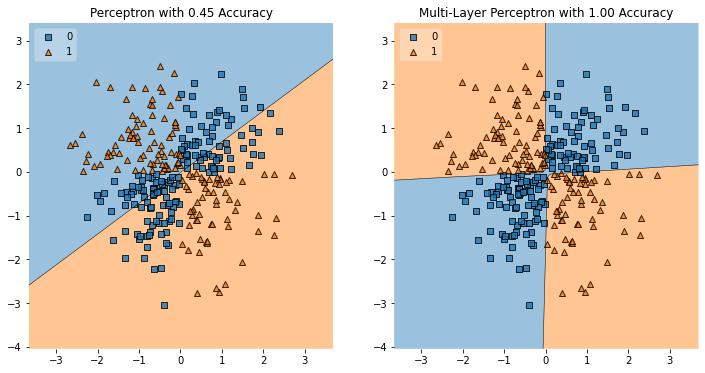

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

fig = plt.figure(figsize=(12,6))

for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

Why does the Perceptron (`model1`) only achieve ~70% accuracy? What is the architectural property of the Multi-Layer Perceptron that allows it more accurately learn the relationship between X and y? 

Why might this property be useful in more complex data such as images?



**YOUR ANSWER HERE**

The Perceptron (model1) only achieve ~70% accuracy because it can only take few inputs, each of which has to signify how important it is and generate an output decision of 0 or 1. The architectural property of the Multi-Layer Perceptron that allows it more accurately learn the relationship between X and y is backpropagation, so the difference between the current output and signal is used to adjust the output layer and then used to adjust hidden layers and going back through the network towards the inputs. the resulting error is propagated back from the output to the input of the network to adjust it.

Backpropagation is useful for deep neural networks working on error-prone projects as image because it allows you to reduce error rates and to make the model reliable by increasing it generalization. It helps to calculate the gradient of a liss function with respects to all the weights in the network.



## 3. Keras MMP <a id="Q3"></a>

- Implement a Multilayer Perceptron architecture of your choosing using the Keras library. 
- Train your model and report its baseline accuracy. 
- Then `hyperparameter tune two parameters each with no more than 3 values each`
    - Due to limited computational resources on CodeGrade `DO NOT INCLUDE ADDITIONAL PARAMETERS OR VALUES PLEASE`
- Report your optimized model's accuracy
- Use the Heart Disease Dataset (binary classification)
- Use an appropriate loss function for a binary classification task
- Use an appropriate activation function on the final layer of your network.
- Train your model using verbose output for ease of grading.
- Use GridSearchCV to hyperparameter tune your model. 
    - **Use `n_jobs` = 1**
- When hyperparameter tuning, show you work by adding code cells for each new experiment.
- Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# load data
data_path = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv'
df = pd.read_csv(data_path)
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2,1
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3,0
232,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
122,41,0,2,112,268,0,0,172,1,0.0,2,0,2,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1


In [ ]:
# Create an input matrix named 'X' store it in a 2D numpy array

# Create an output vector for the labels named 'Y', store it in 1D numpy array

# YOUR CODE HERE
import tensorflow as tf
import numpy
from tensorflow import keras
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV, train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, Adagrad, SGD, Ftrl, RMSprop


target = "target"
features = [column for column in df.columns if column != "target"]

Y = df[target].values
X = df[features].values

normal_X = normalize(X)


X_train, X_test, Y_train, Y_test = train_test_split(normal_X, Y, train_size= 0.8, test_size= 0.2)

print(X_train.shape, X_test.shape)

(242, 13) (61, 13)


In [50]:
model = Sequential([
    Dense(32, activation= "sigmoid", input_shape= (13,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_test, Y_test))

Epoch 1/100
8/8 [==============================] - 0s 22ms/step - loss: 0.2566 - accuracy: 0.3934 - val_loss: 0.2459 - val_accuracy: 0.6066
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.2487 - accuracy: 0.5470 - val_loss: 0.2451 - val_accuracy: 0.6066
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.2509 - accuracy: 0.5015 - val_loss: 0.2451 - val_accuracy: 0.6066
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.2495 - accuracy: 0.5243 - val_loss: 0.2450 - val_accuracy: 0.6066
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 0.2490 - accuracy: 0.5325 - val_loss: 0.2443 - val_accuracy: 0.6066
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.2501 - accuracy: 0.5145 - val_loss: 0.2446 - val_accuracy: 0.6066
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.2475 - accuracy: 0.5584 - val_loss: 0.2443 - val_accuracy: 0.6066
Epoch 8/100
8/8 [=========

In [51]:
# Visible Testing
assert X.shape[0] == 303, "Did you drop/lose some rows in X? Did you properly load and split the data?"
assert X.shape[1] == 13, "Did you drop/lose some columns in X? Did you properly load and split the data?"
assert len(Y)== 303, "Did you drop/lose some rows in Y? Did you properly load and split the data?"

In [52]:
X.shape[0] == 303

True

In [53]:
X.shape[1] == 13

True

In [54]:
len(Y)== 303

True

In [36]:
# Imports to add GridSearch and the classifier

from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [55]:
# Create a function named 'create_model' that returns a complied keras model -  required for KerasClassifier
# YOUR CODE HERE
def create_model(units=32):
    
    # create model
    model = tf.keras.Sequential([
    Dense(32, activation= "sigmoid", input_shape= (13,)),
    Dense(32, activation= "relu"),
    Dense(16, activation= "sigmoid"),
    Dense(8, activation= "relu")
    ])
    
    # compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])
    
    return model

In [56]:
type(create_model())

tensorflow.python.keras.engine.sequential.Sequential

In [57]:
# Visible Testing
assert create_model().__module__ == 'tensorflow.python.keras.engine.sequential', "create_model should return a keras model that was created using the Sequential class."

In [66]:
# Pass 'create_model' into KerasClassifier, store KerasClassifier to a variable named 'model'
# YOUR CODE HERE

# create model
model = KerasClassifier(build_fn=create_model, verbose=1)

In [67]:
# Visible Testing
assert model.__module__ == 'tensorflow.python.keras.wrappers.scikit_learn', "model should be a instance of KerasClassifier."

In [68]:
model.__module__ == 'tensorflow.python.keras.wrappers.scikit_learn',

(True,)

In [69]:
# Define the grid search parameters inside a dictionary named 'param_grid' 
# Use 2 hyper-parameters with no more than 3 possible values for each 

# YOUR CODE HERE
param_grid = {'batch_size': [10, 20, 40], 
              'epochs': [20, 30, 50]}

In [70]:
assert len(param_grid.keys()) == 2, "Did you create a param dict with 2 hyper-parameters as keys?"

In [71]:
# Create Grid Search object and name it 'gs'
# Run Grid Search 
# YOUR CODE HERE
gs = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)

# report results
grid_result = gs.fit(X_train, Y_train)


Epoch 1/20
20/20 [==============================] - 0s 2ms/step - loss: 7.2463 - accuracy: 0.5707
Epoch 2/20
20/20 [==============================] - 0s 2ms/step - loss: 7.5350 - accuracy: 0.4817
Epoch 3/20
20/20 [==============================] - 0s 1ms/step - loss: 2.0794 - accuracy: 0.4669
Epoch 4/20
20/20 [==============================] - 0s 1ms/step - loss: 2.0794 - accuracy: 0.4352
Epoch 5/20
20/20 [==============================] - 0s 1ms/step - loss: 2.0794 - accuracy: 0.4665
Epoch 6/20
20/20 [==============================] - 0s 1ms/step - loss: 2.0794 - accuracy: 0.5018
Epoch 7/20
20/20 [==============================] - 0s 1ms/step - loss: 2.0794 - accuracy: 0.4959
Epoch 8/20
20/20 [==============================] - 0s 1ms/step - loss: 2.0794 - accuracy: 0.4641
Epoch 9/20
20/20 [==============================] - 0s 1ms/step - loss: 2.0794 - accuracy: 0.4572
Epoch 10/20
20/20 [==============================] - 0s 1ms/step - loss: 2.0794 - accuracy: 0.4913
Epoch 11/20
20/20 [

In [72]:
# your grid_result object should be able to run in this code 
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.516411554813385 using {'batch_size': 20, 'epochs': 30}
Means: 0.46726189851760863, Stdev: 0.037363706367378215 with: {'batch_size': 10, 'epochs': 20}
Means: 0.4919217526912689, Stdev: 0.056881965056700415 with: {'batch_size': 10, 'epochs': 30}
Means: 0.46318026185035704, Stdev: 0.04410355731057997 with: {'batch_size': 10, 'epochs': 50}
Means: 0.46318026185035704, Stdev: 0.04410355731057997 with: {'batch_size': 20, 'epochs': 20}
Means: 0.516411554813385, Stdev: 0.05505885492008089 with: {'batch_size': 20, 'epochs': 30}
Means: 0.1733843505382538, Stdev: 0.21431007176908232 with: {'batch_size': 20, 'epochs': 50}
Means: 0.3673469305038452, Stdev: 0.18872512922174514 with: {'batch_size': 40, 'epochs': 20}
Means: 0.46318026185035704, Stdev: 0.04410355731057997 with: {'batch_size': 40, 'epochs': 30}
Means: 0.4205782234668732, Stdev: 0.21657837475261815 with: {'batch_size': 40, 'epochs': 50}
